## Análisis Diagnóstico: Serie temporal de las compras del negocio

Un análisis de serie de tiempo es una técnica estadística que se utiliza para analizar datos secuenciales y observar cómo una variable cambia a lo largo del tiempo. 

En general, el análisis de serie de tiempo ayuda a la empresa a comprender mejor cómo ha evolucionado el comportamiento de las compras en el tiempo, lo que puede ayudar a la toma de decisiones y a la planificación futura de las compras.

### Carga de las librerías de Python necesarias

Se importan las bibliotecas necesarias como pyodbc para conectarse a la base de datos, pandas para leer los datos, numpy para realizar cálculos numéricos, matplotlib y seaborn para la visualización de datos, y scipy para realizar pruebas formales.

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


plt.rcParams['figure.figsize'] = [12, 8]

import warnings
warnings.filterwarnings('ignore')


#### Extracción de los datos desde SQL Server

In [2]:
cnx = pyodbc.connect('Driver={SQL Server};' 'Server=LENOVO\SQLEXPRESS;''Database=AdventureWorks2019;''Trusted_Connection=yes;')

data = pd.read_sql('''select
	CONCAT_WS('-',YEAR(t1.OrderDate), MONTH(t1.OrderDate)) as 'fecha',
	sum(t1.TotalDue) as 'compras'
from Purchasing.PurchaseOrderHeader as t1
group by YEAR(t1.OrderDate), MONTH(t1.OrderDate) 
order by YEAR(t1.OrderDate), MONTH(t1.OrderDate)''', con=cnx)

#### Exploración inicial del dataset extraído

Se observa que el dataset extraído consta de dos variables para tiempo y valor de las compras.

In [3]:
data.shape

(31, 2)

In [4]:
data.columns

Index(['fecha', 'compras'], dtype='object')

In [5]:
data.head()

,fecha,compras
0,2011-4,114804.8822
1,2011-12,330660.1813
2,2012-1,773949.3227
3,2012-2,363072.5658
4,2012-3,714908.3075


### Pre procesamiento de los datos

#### Convertir la columna 'date' a tipo fecha

In [6]:
data['fecha'] = pd.to_datetime(data['fecha'])

#### Establecer la columna 'date' como índice

In [7]:
data.set_index('fecha', inplace=True)

#### Realizar un análisis de decomposición estacional

In [8]:
result = seasonal_decompose(data['compras'], model='multiplicative', freq=12)

### Visualización grafica de resultados

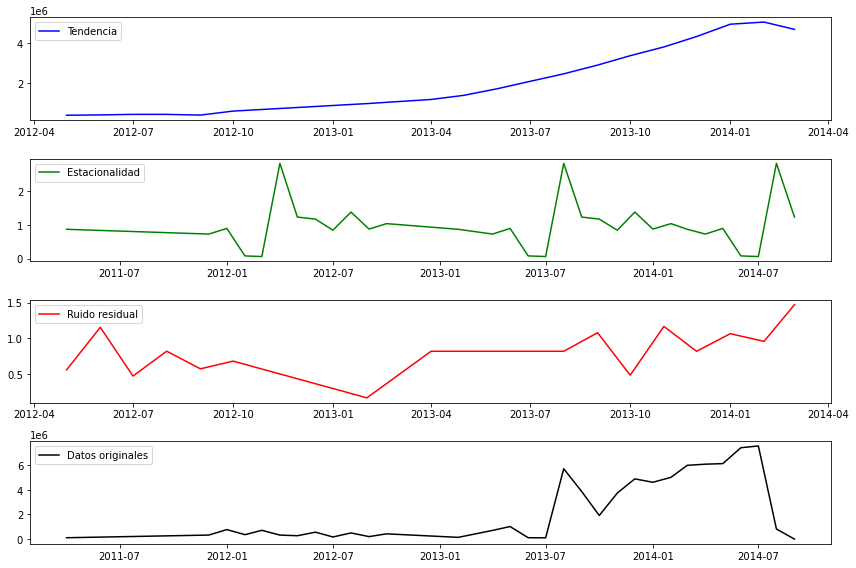

In [9]:
plt.subplot(411)
plt.plot(result.trend, label='Tendencia', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(result.seasonal,label='Estacionalidad', color='green')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(result.resid, label='Ruido residual', color='red')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(data['compras'], label='Datos originales', color='black')
plt.legend(loc='best')

# Ajustar los espacios entre las gráficas
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Pruebas formales para verificar si la serie es estacionaria

La prueba de Dickey-Fuller aumentada (ADF) es una prueba estadística que se utiliza para determinar si una serie de tiempo tiene una raíz unitaria, lo que significa que la serie de tiempo no es estacionaria.

In [10]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['compras'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.9458298981442652
p-value: 0.3108176981122386


*En este caso, el valor de "ADF Statistic" es -1.9458298981442652, lo que indica que la serie de tiempo no es estacionaria.*

El valor de "p-value" es 0.3108176981122386, lo que indica la probabilidad de que el resultado de la prueba de ADF se deba al azar. Un valor de p alto sugiere que no se puede rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria y, por lo tanto, no es estacionaria. En este caso, el valor de p es mayor que 0.05, lo que indica que no podemos rechazar la hipótesis nula.

### Grafica del autocorrelograma y el partial autocorrelograma

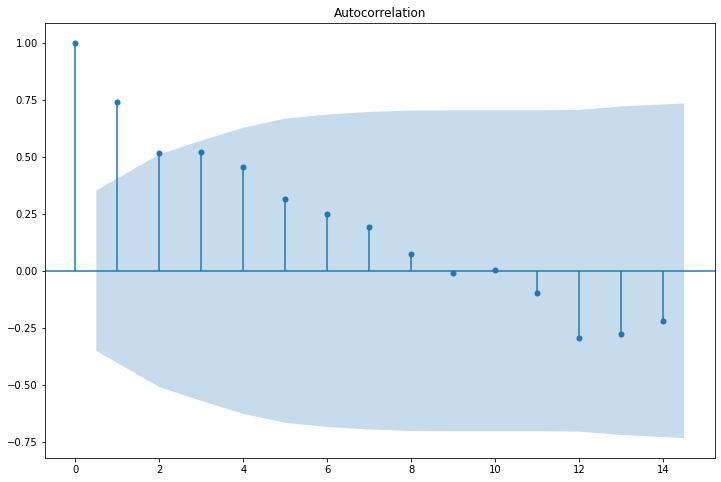

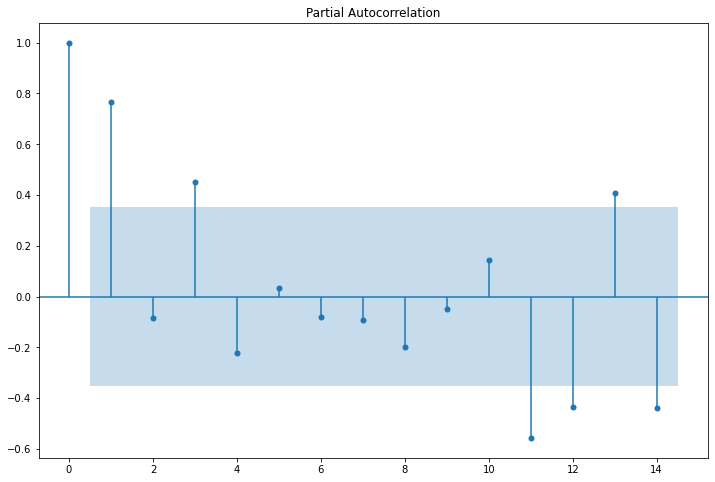

In [11]:
plot_acf(data['compras'], lags=14)
plot_pacf(data['compras'], lags=14)
plt.show()

En resumen, los resultados sugieren que la serie de tiempo no es estacionaria y no podemos concluir que la serie de tiempo es estacionaria sin realizar más análisis y pruebas.

## Conclusiones

El análisis de serie de tiempo realizado incluyó la descomposición estacional, que ayuda a identificar patrones de tendencia y estacionalidad en los datos, y también se realizó una prueba formal para verificar si la serie era estacionaria.

La estacionalidad puede ser importante en este caso, ya que puede haber períodos de mayor o menor demanda de compras en función de la estacionalidad de la industria o de los ciclos económicos. Además, la prueba de estacionariedad ayuda a garantizar que los resultados del análisis sean precisos y útiles para la empresa.

Basado en el análisis realizado, se puede concluir que la serie de tiempo de las compras de **AdventureWorks** no es estacionaria. Esto puede ser un problema para la empresa, ya que la estacionariedad es un requisito para muchos modelos de series de tiempo y análisis. La falta de estacionariedad puede dificultar la predicción y el análisis de tendencias futuras.


## Recomendaciones

Se puede recomendar a la empresa que realice un análisis más detallado de la serie de tiempo y pruebe diferentes modelos y técnicas para encontrar la mejor forma de manejar los datos no estacionarios. Además, se puede recomendar que se recopilen y agreguen más datos para aumentar la cantidad de información disponible y, por lo tanto, mejorar la capacidad de análisis y predicción.